In [141]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [142]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [143]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [144]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/kristenhanold/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite")

In [145]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [146]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [147]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [148]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [149]:
# Find the most recent date in the data set.
session.query(func.count(measurement.date)).all()

[(19550,)]

In [150]:
####Design a query to retrieve the last 12 months of precipitation data and plot the results.####
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# start by finding the last date in the dataset
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The last date is: {lastDate[0]}")

# using the lastDate, we are now calculating the date one year from the last date in data set 
# (adding .strptime to convert string to datetime and .strftime to convert from datetime to string)
query_date = (dt.datetime.strptime(lastDate[0], '%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"The date one year from the last date is: {query_date}")

The last date is: 2017-08-23
The date one year from the last date is: 2016-08-23


In [151]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()
precip_data[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [152]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns=['Date','Precipitation Score'])
precip_df.head()

,Date,Precipitation Score
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [153]:
# Sort the dataframe by date
precip_df.set_index('Date', inplace=True)
precip_df = precip_df.sort_index()
precip_df

,Precipitation Score
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


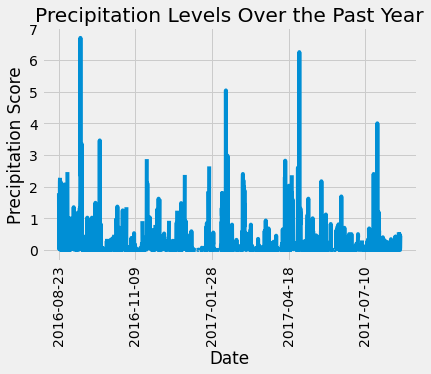

In [154]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot = 90, legend = False)

# Set a titles for the chart
plt.title('Precipitation Levels Over the Past Year')
plt.xlabel('Date')
plt.ylabel('Precipitation Score')

plt.show()

In [155]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [156]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(func.count(station.id)).all()
stations_count

[(9,)]

In [157]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_count = session.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station).\
                        order_by(func.count(measurement.station).desc()).all()
active_stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [158]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').one()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').one()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').one()

print(f'The lowest temperature recorded for station USC00519281 was {lowest_temp}')
print(f'The highest temperature recorded for station USC00519281 was {highest_temp}')
print(f'The average temperature recorded for station USC00519281 was {avg_temp}')

The lowest temperature recorded for station USC00519281 was (54.0,)
The highest temperature recorded for station USC00519281 was (85.0,)
The average temperature recorded for station USC00519281 was (71.66378066378067,)


In [159]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
USC00519281_data = session.query(measurement.date, measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date >= query_date).all()
USC00519281_data[:5]

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0)]

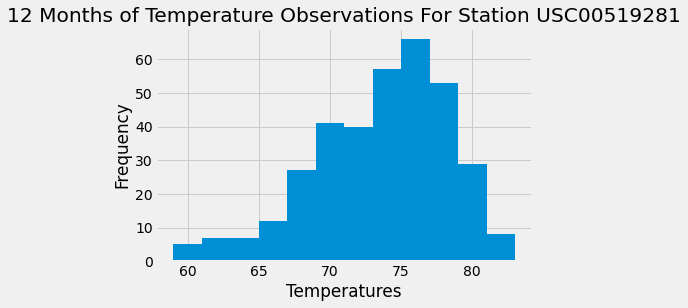

In [166]:
# place station data into a dataframe
USC00519281_df = pd.DataFrame(USC00519281_data)

# Plot the results as a histogram
USC00519281_df.plot(kind = 'hist', bins = 12, legend = False)

# Set a title for the chart
plt.title('12 Months of Temperature Observations For Station USC00519281')
plt.ylabel('Frequency')
plt.xlabel('Temperatures')

plt.show()

# Close Session

In [167]:
session.close()